In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
path = r"C:\Users\hemanth.potti\Downloads\AdventureWorksDW.XLSX"
data = pd.read_excel(path, sheet_name=None)

In [5]:
internetSales = data['FactInternetSales']
product = data['DimProduct']
salesTerritory = data['DimSalesTerritory']
date = data['DimDate']
customer = data['DimCustomer']
geography = data['DimGeography']

# Data Cleaning

In [6]:
internetSales.head()

,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,CustomerKey,PromotionKey,CurrencyKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,...,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,CarrierTrackingNumber,CustomerPONumber,OrderDate,DueDate,ShipDate
0,344,20050722,20050803,20050729,11000,1,6,9,SO43793,1,...,1912.1544,1912.1544,3399.99,271.9992,84.9998,NaN,NaN,2005-07-22,2005-08-03,2005-07-29
1,353,20070722,20070803,20070729,11000,2,6,9,SO51522,1,...,1265.6195,1265.6195,2319.99,185.5992,57.9998,NaN,NaN,2007-07-22,2007-08-03,2007-07-29
2,485,20070722,20070803,20070729,11000,1,6,9,SO51522,2,...,8.2205,8.2205,21.98,1.7584,0.5495,NaN,NaN,2007-07-22,2007-08-03,2007-07-29
3,573,20071104,20071116,20071111,11000,1,6,9,SO57418,1,...,1481.9379,1481.9379,2384.07,190.7256,59.6018,NaN,NaN,2007-11-04,2007-11-16,2007-11-11
4,541,20071104,20071116,20071111,11000,1,6,9,SO57418,2,...,10.8423,10.8423,28.99,2.3192,0.7248,NaN,NaN,2007-11-04,2007-11-16,2007-11-11


In [7]:
internetSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60398 entries, 0 to 60397
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ProductKey             60398 non-null  int64         
 1   OrderDateKey           60398 non-null  int64         
 2   DueDateKey             60398 non-null  int64         
 3   ShipDateKey            60398 non-null  int64         
 4   CustomerKey            60398 non-null  int64         
 5   PromotionKey           60398 non-null  int64         
 6   CurrencyKey            60398 non-null  int64         
 7   SalesTerritoryKey      60398 non-null  int64         
 8   SalesOrderNumber       60398 non-null  object        
 9   SalesOrderLineNumber   60398 non-null  int64         
 10  RevisionNumber         60398 non-null  int64         
 11  OrderQuantity          60398 non-null  int64         
 12  UnitPrice              60398 non-null  float64       
 13  E

In [8]:
internetSales.isnull().sum()

ProductKey                   0
OrderDateKey                 0
DueDateKey                   0
ShipDateKey                  0
CustomerKey                  0
PromotionKey                 0
CurrencyKey                  0
SalesTerritoryKey            0
SalesOrderNumber             0
SalesOrderLineNumber         0
RevisionNumber               0
OrderQuantity                0
UnitPrice                    0
ExtendedAmount               0
UnitPriceDiscountPct         0
DiscountAmount               0
ProductStandardCost          0
TotalProductCost             0
SalesAmount                  0
TaxAmt                       0
Freight                      0
CarrierTrackingNumber    60398
CustomerPONumber         60398
OrderDate                    0
DueDate                      0
ShipDate                     0
dtype: int64

In [9]:
columns_to_drop = ['CarrierTrackingNumber', 'CustomerPONumber']  
internetSales_cleaned = internetSales.drop(columns=columns_to_drop)

# Product

In [10]:
product.head()

,ProductKey,ProductAlternateKey,ProductSubcategoryKey,WeightUnitMeasureCode,SizeUnitMeasureCode,EnglishProductName,SpanishProductName,FrenchProductName,StandardCost,FinishedGoodsFlag,...,ChineseDescription,ArabicDescription,HebrewDescription,ThaiDescription,GermanDescription,JapaneseDescription,TurkishDescription,StartDate,EndDate,Status
0,1,AR-5381,NaN,NaN,NaN,Adjustable Race,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998-06-01,NaT,Current
1,2,BA-8327,NaN,NaN,NaN,Bearing Ball,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998-06-01,NaT,Current
2,3,BE-2349,NaN,NaN,NaN,BB Ball Bearing,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998-06-01,NaT,Current
3,4,BE-2908,NaN,NaN,NaN,Headset Ball Bearings,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998-06-01,NaT,Current
4,5,BL-2036,NaN,NaN,NaN,Blade,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998-06-01,NaT,Current


In [11]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ProductKey             606 non-null    int64         
 1   ProductAlternateKey    606 non-null    object        
 2   ProductSubcategoryKey  397 non-null    float64       
 3   WeightUnitMeasureCode  282 non-null    object        
 4   SizeUnitMeasureCode    253 non-null    object        
 5   EnglishProductName     606 non-null    object        
 6   SpanishProductName     319 non-null    object        
 7   FrenchProductName      319 non-null    object        
 8   StandardCost           395 non-null    float64       
 9   FinishedGoodsFlag      606 non-null    bool          
 10  Color                  352 non-null    object        
 11  SafetyStockLevel       606 non-null    int64         
 12  ReorderPoint           606 non-null    int64         
 13  ListP

In [12]:
product.isnull().sum()

ProductKey                 0
ProductAlternateKey        0
ProductSubcategoryKey    209
WeightUnitMeasureCode    324
SizeUnitMeasureCode      353
EnglishProductName         0
SpanishProductName       287
FrenchProductName        287
StandardCost             211
FinishedGoodsFlag          0
Color                    254
SafetyStockLevel           0
ReorderPoint               0
ListPrice                211
Size                     307
SizeRange                307
Weight                   324
DaysToManufacture          0
ProductLine              226
DealerPrice              211
Class                    276
Style                    305
ModelName                209
LargePhoto               606
EnglishDescription       210
FrenchDescription        210
ChineseDescription       210
ArabicDescription        210
HebrewDescription        210
ThaiDescription          210
GermanDescription        210
JapaneseDescription      210
TurkishDescription       210
StartDate                  0
EndDate       

In [13]:
product_cleaned = product
product_cleaned['StandardCost'].fillna(product['StandardCost'].mean(), inplace=True)
product_cleaned['Weight'].fillna(product['Weight'].mean(), inplace=True)

In [14]:
product_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ProductKey             606 non-null    int64         
 1   ProductAlternateKey    606 non-null    object        
 2   ProductSubcategoryKey  397 non-null    float64       
 3   WeightUnitMeasureCode  282 non-null    object        
 4   SizeUnitMeasureCode    253 non-null    object        
 5   EnglishProductName     606 non-null    object        
 6   SpanishProductName     319 non-null    object        
 7   FrenchProductName      319 non-null    object        
 8   StandardCost           606 non-null    float64       
 9   FinishedGoodsFlag      606 non-null    bool          
 10  Color                  352 non-null    object        
 11  SafetyStockLevel       606 non-null    int64         
 12  ReorderPoint           606 non-null    int64         
 13  ListP

In [15]:
date_columns = ['OrderDate', 'DueDate', 'ShipDate']
internetSales_cleaned[date_columns] = internetSales_cleaned[date_columns].apply(pd.to_datetime)

# Sales Territory

In [16]:
salesTerritory.head()

,SalesTerritoryKey,SalesTerritoryAlternateKey,SalesTerritoryRegion,SalesTerritoryCountry,SalesTerritoryGroup,SalesTerritoryImage
0,1,1,Northwest,United States,North America,NaN
1,2,2,Northeast,United States,North America,NaN
2,3,3,Central,United States,North America,NaN
3,4,4,Southwest,United States,North America,NaN
4,5,5,Southeast,United States,North America,NaN


In [17]:
salesTerritory['SalesTerritoryRegion'].value_counts()

SalesTerritoryRegion
Northwest         1
Northeast         1
Central           1
Southwest         1
Southeast         1
Canada            1
France            1
Germany           1
Australia         1
United Kingdom    1
Name: count, dtype: int64

In [18]:
salesTerritory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SalesTerritoryKey           11 non-null     int64  
 1   SalesTerritoryAlternateKey  11 non-null     int64  
 2   SalesTerritoryRegion        10 non-null     object 
 3   SalesTerritoryCountry       10 non-null     object 
 4   SalesTerritoryGroup         10 non-null     object 
 5   SalesTerritoryImage         0 non-null      float64
dtypes: float64(1), int64(2), object(3)
memory usage: 660.0+ bytes


In [19]:
salesTerritory.isnull().sum()

SalesTerritoryKey              0
SalesTerritoryAlternateKey     0
SalesTerritoryRegion           1
SalesTerritoryCountry          1
SalesTerritoryGroup            1
SalesTerritoryImage           11
dtype: int64

In [20]:
columns_to_drop_dst = ['SalesTerritoryImage']  

salesTerritory_cleaned = salesTerritory.drop(columns=columns_to_drop_dst)

# Date

In [21]:
date.head()

,DateKey,FullDateAlternateKey,DayNumberOfWeek,EnglishDayNameOfWeek,SpanishDayNameOfWeek,FrenchDayNameOfWeek,DayNumberOfMonth,DayNumberOfYear,WeekNumberOfYear,EnglishMonthName,SpanishMonthName,FrenchMonthName,MonthNumberOfYear,CalendarQuarter,CalendarYear,CalendarSemester,FiscalQuarter,FiscalYear,FiscalSemester
0,20050101,2005-01-01,7,Saturday,Sábado,Samedi,1,1,1,January,Enero,Janvier,1,1,2005,1,3,2005,2
1,20050102,2005-01-02,1,Sunday,Domingo,Dimanche,2,2,2,January,Enero,Janvier,1,1,2005,1,3,2005,2
2,20050103,2005-01-03,2,Monday,Lunes,Lundi,3,3,2,January,Enero,Janvier,1,1,2005,1,3,2005,2
3,20050104,2005-01-04,3,Tuesday,Martes,Mardi,4,4,2,January,Enero,Janvier,1,1,2005,1,3,2005,2
4,20050105,2005-01-05,4,Wednesday,Miércoles,Mercredi,5,5,2,January,Enero,Janvier,1,1,2005,1,3,2005,2


In [22]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   DateKey               2191 non-null   int64         
 1   FullDateAlternateKey  2191 non-null   datetime64[ns]
 2   DayNumberOfWeek       2191 non-null   int64         
 3   EnglishDayNameOfWeek  2191 non-null   object        
 4   SpanishDayNameOfWeek  2191 non-null   object        
 5   FrenchDayNameOfWeek   2191 non-null   object        
 6   DayNumberOfMonth      2191 non-null   int64         
 7   DayNumberOfYear       2191 non-null   int64         
 8   WeekNumberOfYear      2191 non-null   int64         
 9   EnglishMonthName      2191 non-null   object        
 10  SpanishMonthName      2191 non-null   object        
 11  FrenchMonthName       2191 non-null   object        
 12  MonthNumberOfYear     2191 non-null   int64         
 13  CalendarQuarter   

In [23]:
date.isnull().sum()

DateKey                 0
FullDateAlternateKey    0
DayNumberOfWeek         0
EnglishDayNameOfWeek    0
SpanishDayNameOfWeek    0
FrenchDayNameOfWeek     0
DayNumberOfMonth        0
DayNumberOfYear         0
WeekNumberOfYear        0
EnglishMonthName        0
SpanishMonthName        0
FrenchMonthName         0
MonthNumberOfYear       0
CalendarQuarter         0
CalendarYear            0
CalendarSemester        0
FiscalQuarter           0
FiscalYear              0
FiscalSemester          0
dtype: int64

# Customer

In [24]:
customer.head()

,CustomerKey,GeographyKey,CustomerAlternateKey,Title,FirstName,MiddleName,LastName,NameStyle,BirthDate,MaritalStatus,...,EnglishOccupation,SpanishOccupation,FrenchOccupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,AddressLine2,Phone,DateFirstPurchase,CommuteDistance
0,11000,26,AW00011000,NaN,Jon,V,Yang,False,1966-04-08,M,...,Professional,Profesional,Cadre,1,0,3761 N. 14th St,NaN,1 (11) 500 555-0162,2005-07-22,1-2 Miles
1,11001,37,AW00011001,NaN,Eugene,L,Huang,False,1965-05-14,S,...,Professional,Profesional,Cadre,0,1,2243 W St.,NaN,1 (11) 500 555-0110,2005-07-18,0-1 Miles
2,11002,31,AW00011002,NaN,Ruben,NaN,Torres,False,1965-08-12,M,...,Professional,Profesional,Cadre,1,1,5844 Linden Land,NaN,1 (11) 500 555-0184,2005-07-10,2-5 Miles
3,11003,11,AW00011003,NaN,Christy,NaN,Zhu,False,1968-02-15,S,...,Professional,Profesional,Cadre,0,1,1825 Village Pl.,NaN,1 (11) 500 555-0162,2005-07-01,5-10 Miles
4,11004,19,AW00011004,NaN,Elizabeth,NaN,Johnson,False,1968-08-08,S,...,Professional,Profesional,Cadre,1,4,7553 Harness Circle,NaN,1 (11) 500 555-0131,2005-07-26,1-2 Miles


In [25]:
customer.EmailAddress

0             jon24@adventure-works.com
1          eugene10@adventure-works.com
2           ruben35@adventure-works.com
3         christy12@adventure-works.com
4        elizabeth5@adventure-works.com
                      ...              
18479        tommy2@adventure-works.com
18480        nina21@adventure-works.com
18481         ivan0@adventure-works.com
18482      clayton0@adventure-works.com
18483        jésus9@adventure-works.com
Name: EmailAddress, Length: 18484, dtype: object

In [26]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerKey           18484 non-null  int64         
 1   GeographyKey          18484 non-null  int64         
 2   CustomerAlternateKey  18484 non-null  object        
 3   Title                 101 non-null    object        
 4   FirstName             18484 non-null  object        
 5   MiddleName            10654 non-null  object        
 6   LastName              18484 non-null  object        
 7   NameStyle             18484 non-null  bool          
 8   BirthDate             18484 non-null  datetime64[ns]
 9   MaritalStatus         18484 non-null  object        
 10  Suffix                3 non-null      object        
 11  Gender                18484 non-null  object        
 12  EmailAddress          18484 non-null  object        
 13  YearlyIncome    

In [27]:
customer.isnull().sum()

CustomerKey                 0
GeographyKey                0
CustomerAlternateKey        0
Title                   18383
FirstName                   0
MiddleName               7830
LastName                    0
NameStyle                   0
BirthDate                   0
MaritalStatus               0
Suffix                  18481
Gender                      0
EmailAddress                0
YearlyIncome                0
TotalChildren               0
NumberChildrenAtHome        0
EnglishEducation            0
SpanishEducation            0
FrenchEducation             0
EnglishOccupation           0
SpanishOccupation           0
FrenchOccupation            0
HouseOwnerFlag              0
NumberCarsOwned             0
AddressLine1                0
AddressLine2            18172
Phone                       0
DateFirstPurchase           0
CommuteDistance             0
dtype: int64

In [28]:
columns_to_drop_dc = ['Suffix']  # Adjust based on your schema

customer_cleaned = customer.drop(columns=columns_to_drop_dc)

# Geography

In [29]:
geography.head()

,GeographyKey,City,StateProvinceCode,StateProvinceName,CountryRegionCode,EnglishCountryRegionName,SpanishCountryRegionName,FrenchCountryRegionName,PostalCode,SalesTerritoryKey,IpAddressLocator
0,1,Alexandria,NSW,New South Wales,AU,Australia,Australia,Australie,2015,9,198.51.100.2
1,2,Coffs Harbour,NSW,New South Wales,AU,Australia,Australia,Australie,2450,9,198.51.100.3
2,3,Darlinghurst,NSW,New South Wales,AU,Australia,Australia,Australie,2010,9,198.51.100.4
3,4,Goulburn,NSW,New South Wales,AU,Australia,Australia,Australie,2580,9,198.51.100.5
4,5,Lane Cove,NSW,New South Wales,AU,Australia,Australia,Australie,1597,9,198.51.100.6


In [30]:
geography.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655 entries, 0 to 654
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   GeographyKey              655 non-null    int64 
 1   City                      655 non-null    object
 2   StateProvinceCode         655 non-null    object
 3   StateProvinceName         655 non-null    object
 4   CountryRegionCode         655 non-null    object
 5   EnglishCountryRegionName  655 non-null    object
 6   SpanishCountryRegionName  655 non-null    object
 7   FrenchCountryRegionName   655 non-null    object
 8   PostalCode                655 non-null    object
 9   SalesTerritoryKey         655 non-null    int64 
 10  IpAddressLocator          655 non-null    object
dtypes: int64(2), object(9)
memory usage: 56.4+ KB


In [31]:
geography.isnull().sum()

GeographyKey                0
City                        0
StateProvinceCode           0
StateProvinceName           0
CountryRegionCode           0
EnglishCountryRegionName    0
SpanishCountryRegionName    0
FrenchCountryRegionName     0
PostalCode                  0
SalesTerritoryKey           0
IpAddressLocator            0
dtype: int64

In [32]:
# Merging FactInternetSales with DimProduct
merged_data = pd.merge(internetSales_cleaned, product_cleaned, how='left', left_on='ProductKey', right_on='ProductKey')

# Merging with DimSalesTerritory
merged_data = pd.merge(merged_data, salesTerritory_cleaned, how='left', left_on='SalesTerritoryKey', right_on='SalesTerritoryKey')

# Merging with DimDate for OrderDate, DueDate, and ShipDate
merged_data = pd.merge(merged_data, date, how='left', left_on='OrderDateKey', right_on='DateKey', suffixes=('', '_Order'))
merged_data = pd.merge(merged_data, date, how='left', left_on='DueDateKey', right_on='DateKey', suffixes=('', '_Due'))
merged_data = pd.merge(merged_data, date, how='left', left_on='ShipDateKey', right_on='DateKey', suffixes=('', '_Ship'))

# Merging with DimCustomer
merged_data = pd.merge(merged_data, customer_cleaned, how='left', left_on='CustomerKey', right_on='CustomerKey')

# Merging with DimGeography
merged_data = pd.merge(merged_data, geography, how='left', left_on='GeographyKey', right_on='GeographyKey')

# Dropping redundant date columns from DimDate
#columns_to_drop = ['DateKey_Order', 'DateKey_Due', 'DateKey_Ship']
#merged_data.drop(columns=columns_to_drop, inplace=True)

# Display merged data
merged_data.head()


,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,CustomerKey,PromotionKey,CurrencyKey,SalesTerritoryKey_x,SalesOrderNumber,SalesOrderLineNumber,...,City,StateProvinceCode,StateProvinceName,CountryRegionCode,EnglishCountryRegionName,SpanishCountryRegionName,FrenchCountryRegionName,PostalCode,SalesTerritoryKey_y,IpAddressLocator
0,344,20050722,20050803,20050729,11000,1,6,9,SO43793,1,...,Rockhampton,QLD,Queensland,AU,Australia,Australia,Australie,4700,9,198.51.100.27
1,353,20070722,20070803,20070729,11000,2,6,9,SO51522,1,...,Rockhampton,QLD,Queensland,AU,Australia,Australia,Australie,4700,9,198.51.100.27
2,485,20070722,20070803,20070729,11000,1,6,9,SO51522,2,...,Rockhampton,QLD,Queensland,AU,Australia,Australia,Australie,4700,9,198.51.100.27
3,573,20071104,20071116,20071111,11000,1,6,9,SO57418,1,...,Rockhampton,QLD,Queensland,AU,Australia,Australia,Australie,4700,9,198.51.100.27
4,541,20071104,20071116,20071111,11000,1,6,9,SO57418,2,...,Rockhampton,QLD,Queensland,AU,Australia,Australia,Australie,4700,9,198.51.100.27


# Visualization

### Sales Amount vs Frequence

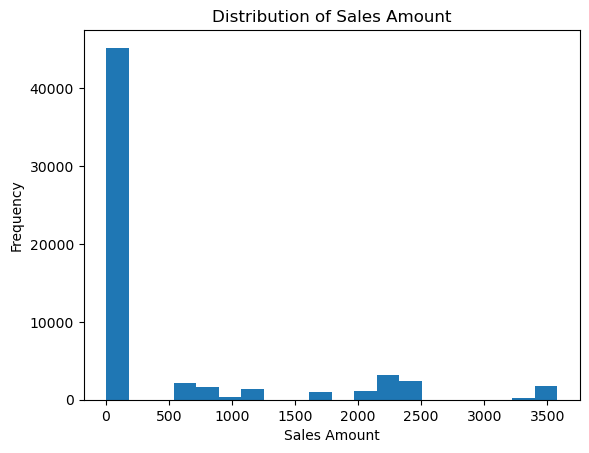

In [33]:
plt.hist(internetSales_cleaned['SalesAmount'], bins=20)
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Sales Amount')
plt.show()

### Sales Amount by Sales Territory Region

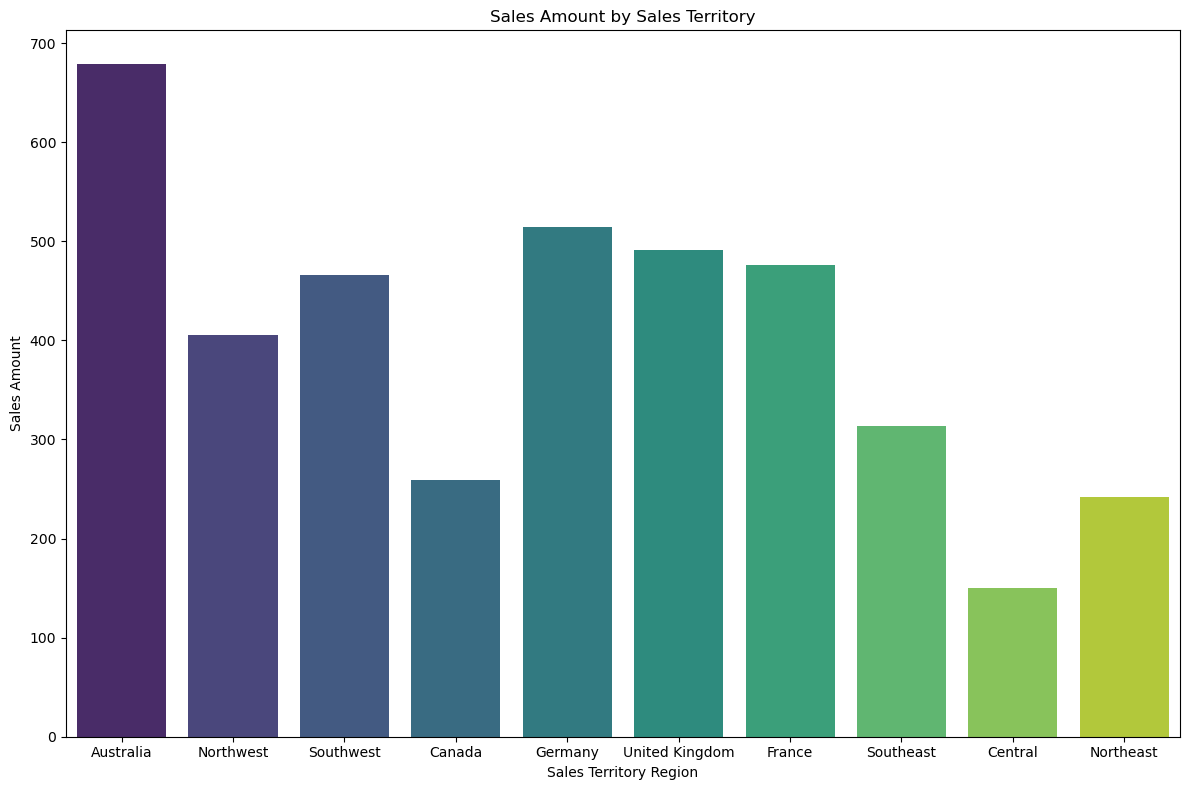

In [34]:
plt.figure(figsize=(12, 8))
sns.barplot(x='SalesTerritoryRegion', y='SalesAmount', data=merged_data, errorbar=None, palette='viridis')
plt.title('Sales Amount by Sales Territory')
plt.xlabel('Sales Territory Region')
plt.ylabel('Sales Amount')
plt.tight_layout()

# Save the plot as a file
plt.savefig("SalesTerritory.png", bbox_inches='tight')
plt.show()

### Monthly Sales Trend

In [65]:
monthly_sales['OrderMonth'] = monthly_sales['OrderMonth'].dt.to_timestamp()

# Ensure SalesAmount is numeric
monthly_sales['SalesAmount'] = pd.to_numeric(monthly_sales['SalesAmount'], errors='coerce')

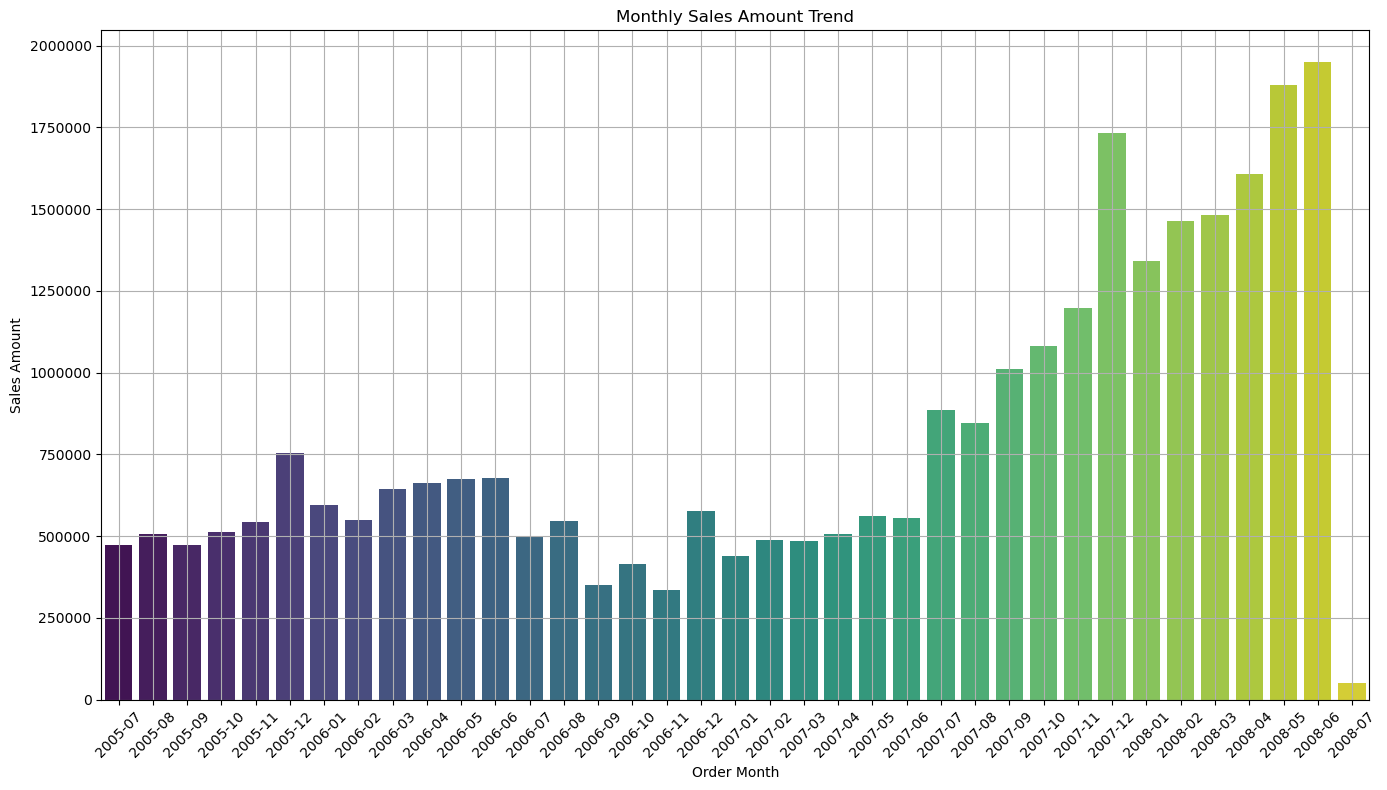

In [76]:
merged_data['OrderMonth'] = merged_data['OrderDate'].dt.to_period('M')

# Grouping by month and calculating total sales amount
monthly_sales = merged_data.groupby('OrderMonth')['SalesAmount'].sum().reset_index()

# Plotting the trend
plt.figure(figsize=(14, 8))
ax=sns.barplot(x=monthly_sales['OrderMonth'], y=monthly_sales['SalesAmount'], palette='viridis')
#monthly_sales.plot(x='OrderMonth', y='SalesAmount')
plt.title('Monthly Sales Amount Trend')
plt.xlabel('Order Month')
plt.ylabel('Sales Amount')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Save the plot as a file
plt.savefig("seaborn_plot.png", bbox_inches='tight')
plt.show()


C:\Users\animesh.agarwal\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\animesh.agarwal\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


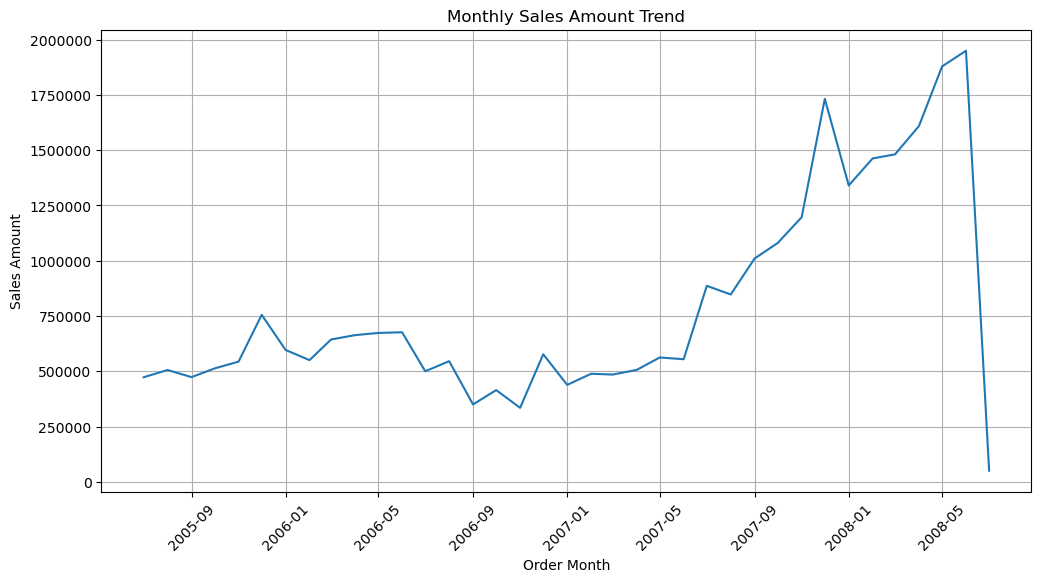

In [39]:
monthly_sale = merged_data.groupby('OrderMonth')['SalesAmount'].sum().reset_index()
monthly_sale['OrderMonth'] = monthly_sale['OrderMonth'].dt.to_timestamp()
monthly_sale = monthly_sale.dropna(subset=['OrderMonth', 'SalesAmount'])

# Ensure SalesAmount is numeric
monthly_sale['SalesAmount'] = pd.to_numeric(monthly_sale['SalesAmount'], errors='coerce')
# Plotting the trend
plt.figure(figsize=(12, 6))
sns.lineplot(x='OrderMonth', y='SalesAmount', data=monthly_sale)
plt.title('Monthly Sales Amount Trend')
plt.xlabel('Order Month')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)

plt.show()

### Quarterly Sales Amount Trend

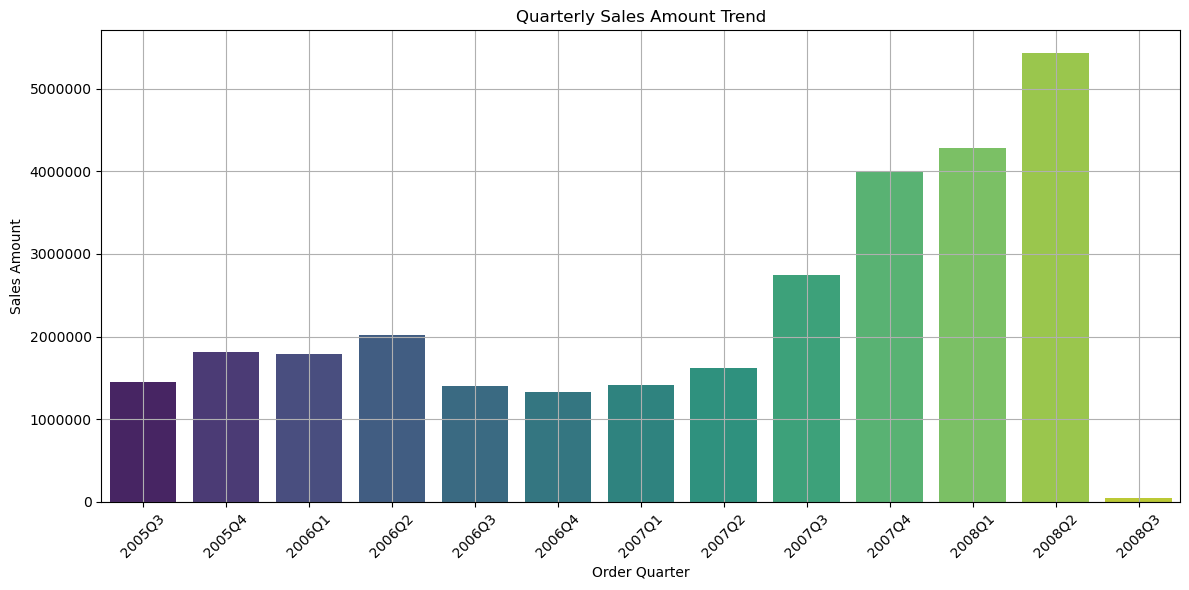

In [77]:
merged_data['OrderQuarter'] = merged_data['OrderDate'].dt.to_period('Q')

# Grouping by quarter and calculating total sales amount
quarterly_sales = merged_data.groupby('OrderQuarter')['SalesAmount'].sum().reset_index()

# Plotting the trend
plt.figure(figsize=(12, 6))
sns.barplot(x='OrderQuarter', y='SalesAmount', data=quarterly_sales, palette='viridis')
plt.title('Quarterly Sales Amount Trend')
plt.xlabel('Order Quarter')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.tight_layout()

# Save the plot as a file
plt.savefig("Quarterlysales.png", bbox_inches='tight')
plt.show()

### Top 20 Sales Amount by Product Category

In [38]:
sorted(customer_cleaned['YearlyIncome'],  reverse=True)

[170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 170000,
 

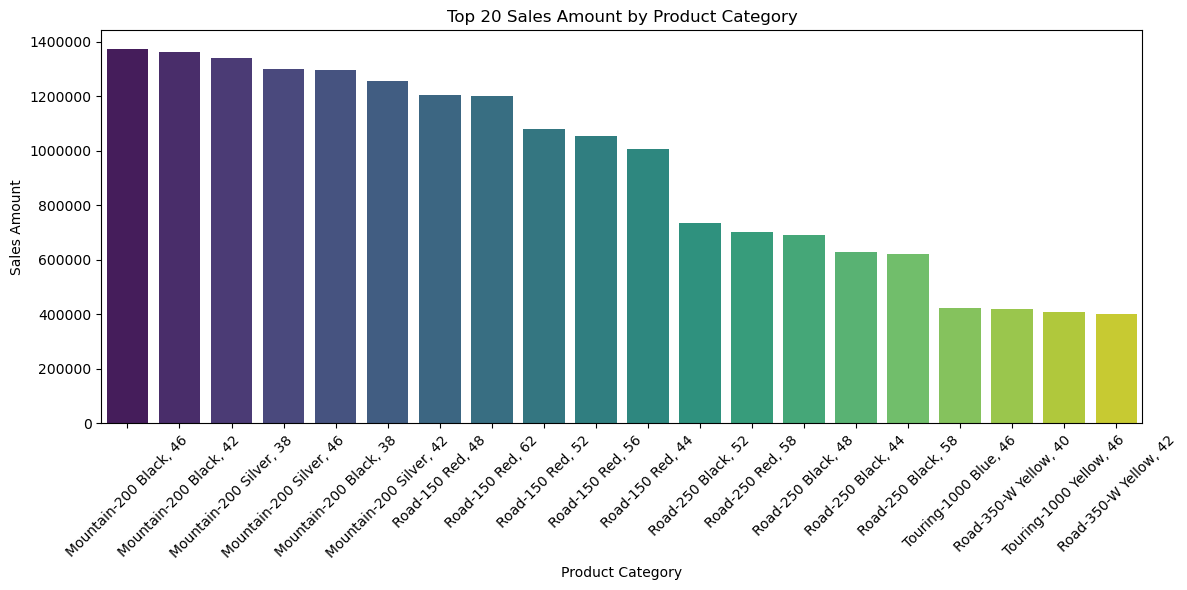

In [35]:
product_sales = merged_data.groupby('EnglishProductName')['SalesAmount'].sum().reset_index()
top_n = 20
top_product_sales = product_sales.nlargest(top_n, 'SalesAmount')

# Plotting sales by top N product categories
plt.figure(figsize=(12, 6))
sns.barplot(x='EnglishProductName', y='SalesAmount', data=top_product_sales, palette='viridis')
plt.title(f'Top {top_n} Sales Amount by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()

# Save the plot as a file
plt.savefig("Topperformingprod.png", bbox_inches='tight')
plt.show()

### Distribution of cutomers by gender

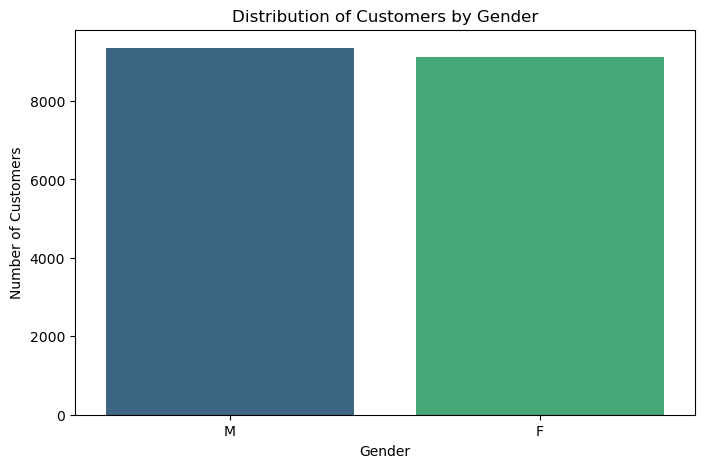

In [43]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=customer_cleaned, palette='viridis' )
plt.title('Distribution of Customers by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()

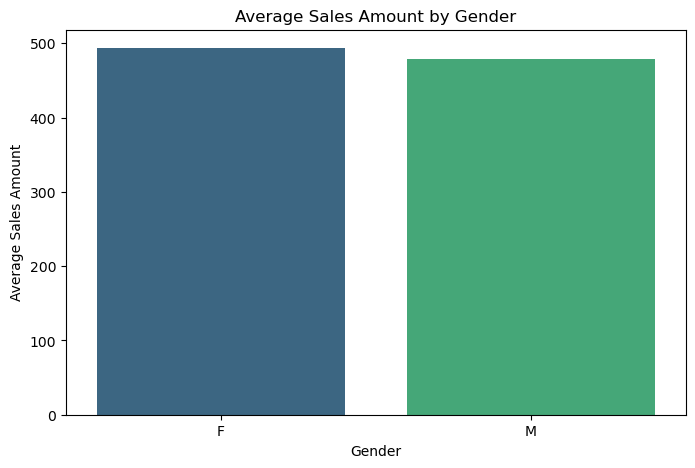

In [44]:
gender_sales_avg = merged_data.groupby('Gender')['SalesAmount'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='Gender', y='SalesAmount', data=gender_sales_avg, palette='viridis')
plt.title('Average Sales Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Sales Amount')
plt.show()

### Age

In [65]:
from datetime import datetime
current_year = datetime.now().year
merged_data['Age'] = current_year - merged_data['BirthDate'].dt.year

# Display the first few rows to verify the new 'Age' column
merged_data[['CustomerKey', 'BirthDate', 'Age']].head()


,CustomerKey,BirthDate,Age
0,11000,1966-04-08,58
1,11000,1966-04-08,58
2,11000,1966-04-08,58
3,11000,1966-04-08,58
4,11000,1966-04-08,58


C:\Users\animesh.agarwal\AppData\Local\Temp\ipykernel_37968\2083541033.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(merged_data['Age'], bins=30, kde=True,  palette='viridis')
C:\Users\animesh.agarwal\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


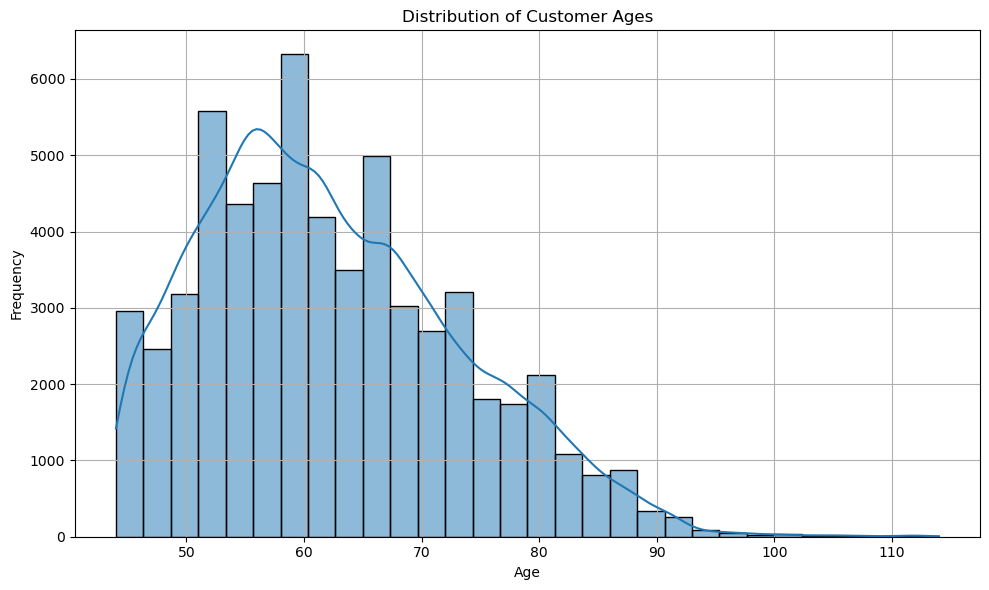

In [78]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['Age'], bins=30, kde=True,  palette='viridis')
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()

# Save the plot as a file
plt.savefig("CustomerAge.png", bbox_inches='tight')
plt.show()

C:\Users\animesh.agarwal\AppData\Local\Temp\ipykernel_37968\3038312586.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sales_avg = merged_data.groupby('AgeGroup')['SalesAmount'].mean().reset_index()
C:\Users\animesh.agarwal\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


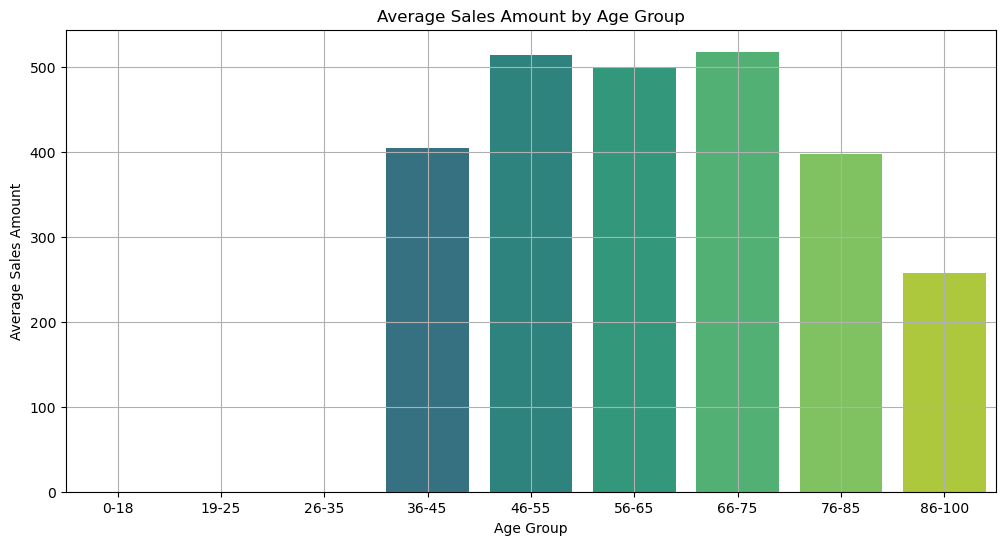

In [67]:
age_bins = [0, 18, 25, 35, 45, 55, 65, 75, 85, 100]
age_labels = ['0-18', '19-25','26-35','36-45', '46-55', '56-65', '66-75', '76-85', '86-100']
merged_data['AgeGroup'] = pd.cut(merged_data['Age'], bins=age_bins, labels=age_labels)

# Group by age group and calculate average sales amount
age_sales_avg = merged_data.groupby('AgeGroup')['SalesAmount'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='AgeGroup', y='SalesAmount', data=age_sales_avg, palette='viridis')
plt.title('Average Sales Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Sales Amount')
plt.grid(True)
plt.show()

C:\Users\animesh.agarwal\AppData\Local\Temp\ipykernel_37968\1593317710.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_order_count = merged_data.groupby('AgeGroup')['SalesAmount'].count().reset_index()
C:\Users\animesh.agarwal\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


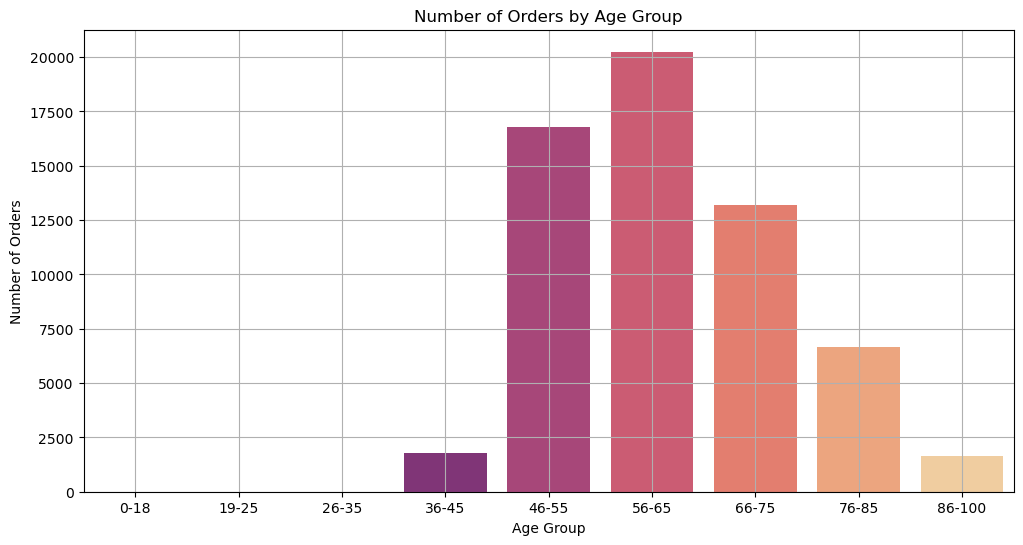

In [62]:
# Group by age group and calculate number of orders
age_order_count = merged_data.groupby('AgeGroup')['SalesAmount'].count().reset_index()
age_order_count.columns = ['AgeGroup', 'NumberOfOrders']

plt.figure(figsize=(12, 6))
sns.barplot(x='AgeGroup', y='NumberOfOrders', data=age_order_count, palette='magma')
plt.title('Number of Orders by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()


### Top 50 customers by Sales Amount

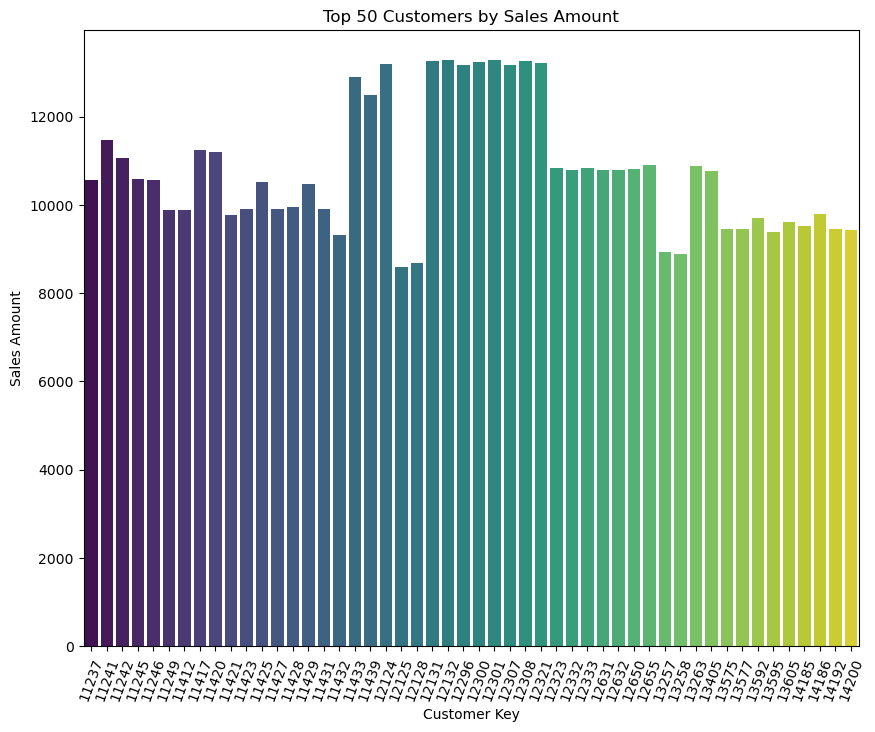

In [47]:
# Grouping by customer and calculating total sales amount
customer_sales = merged_data.groupby('CustomerKey')['SalesAmount'].sum().reset_index()

# Plotting top customers by sales amount
top_customers = customer_sales.nlargest(50, 'SalesAmount')
plt.figure(figsize=(10, 8))
sns.barplot(x='CustomerKey', y='SalesAmount', data=top_customers, palette='viridis')
plt.title('Top 50 Customers by Sales Amount')
plt.xlabel('Customer Key')
plt.ylabel('Sales Amount')
plt.xticks(rotation=70)
plt.show()


### Comparison of Sales Amount: Top 15 Percentile vs Other 85 Percentile Customers

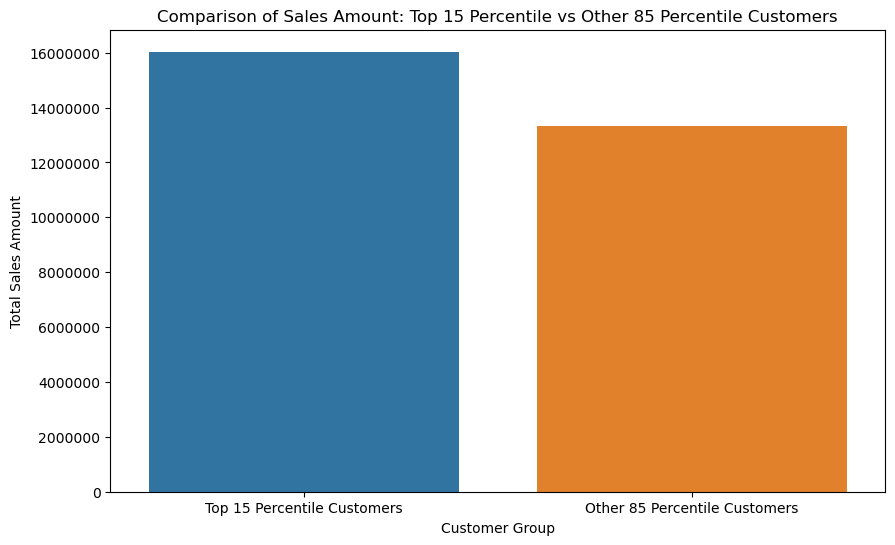

In [46]:
customer_sales = merged_data.groupby('CustomerKey')['SalesAmount'].sum().reset_index()

top_x_percentile = 0.15
sales_threshold = customer_sales['SalesAmount'].quantile(1 - top_x_percentile)

# Separate the customers into top X percentile and the remaining customers
top_customers = customer_sales[customer_sales['SalesAmount'] >= sales_threshold]
other_customers = customer_sales[customer_sales['SalesAmount'] < sales_threshold]

# Calculate total sales for each group
top_sales_total = top_customers['SalesAmount'].sum()
other_sales_total = other_customers['SalesAmount'].sum()

# Prepare data for plotting
comparison_data = pd.DataFrame({
    'Group': ['Top 15 Percentile Customers', 'Other 85 Percentile Customers'],
    'TotalSalesAmount': [top_sales_total, other_sales_total]
})

# Plotting the comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Group', y='TotalSalesAmount', data=comparison_data)
plt.title('Comparison of Sales Amount: Top 15 Percentile vs Other 85 Percentile Customers')
plt.xlabel('Customer Group')
plt.ylabel('Total Sales Amount')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

### Total Sales Amount by Sales Territory

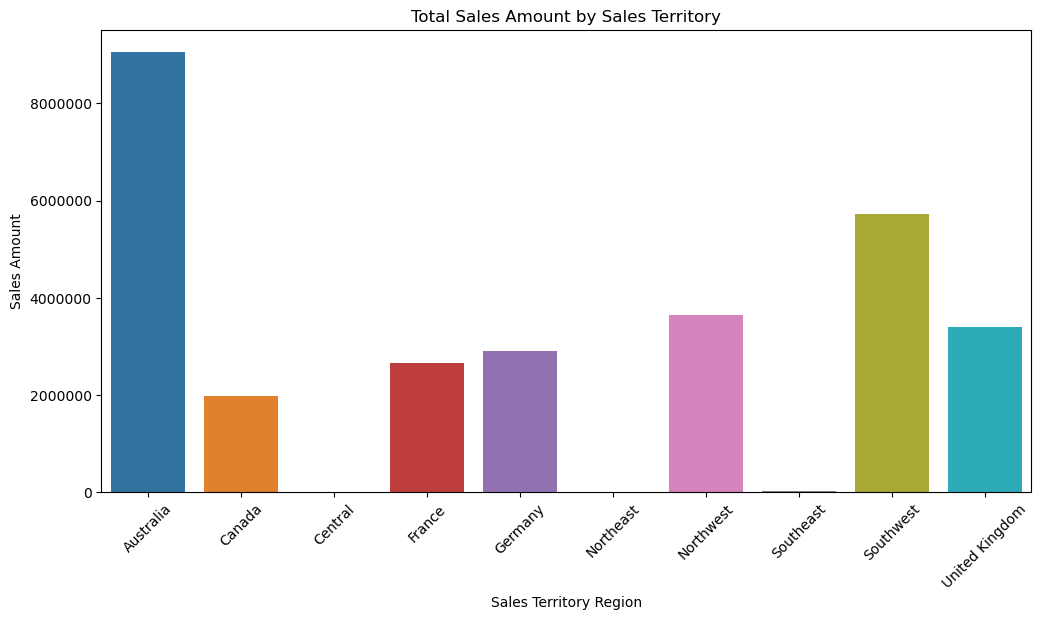

In [157]:
# Grouping by sales territory and calculating total sales amount
territory_sales = merged_data.groupby('SalesTerritoryRegion')['SalesAmount'].sum().reset_index()

# Plotting sales by sales territory
plt.figure(figsize=(12, 6))
sns.barplot(x='SalesTerritoryRegion', y='SalesAmount', data=territory_sales)
plt.title('Total Sales Amount by Sales Territory')
plt.xlabel('Sales Territory Region')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.show()


### Total Product Cose vs Sales Amount

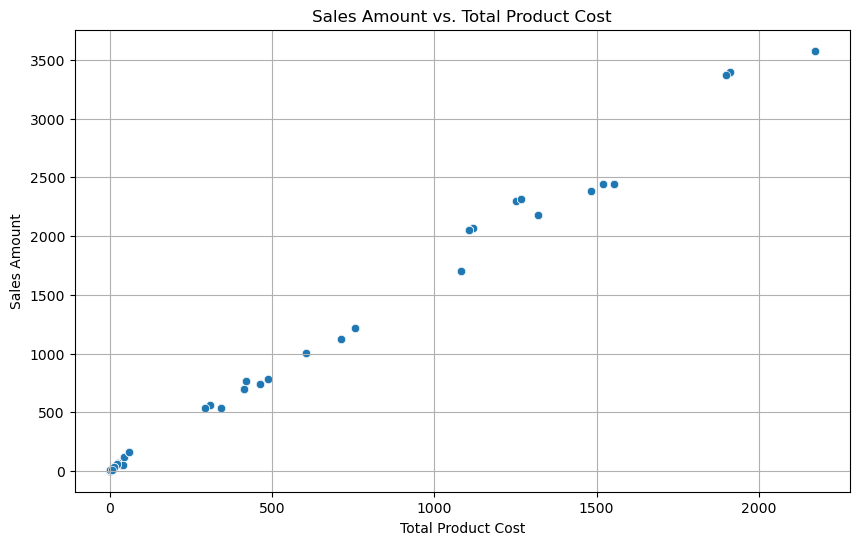

In [177]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalProductCost', y='SalesAmount', data=merged_data)
plt.title('Sales Amount vs. Total Product Cost')
plt.xlabel('Total Product Cost')
plt.ylabel('Sales Amount')
plt.grid(True)
plt.show()

### Total Expenditure Based on Yearly Income

C:\Users\hemanth.potti\AppData\Local\Temp\ipykernel_11776\85219328.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_sales_avg = merged_data.groupby('YearlyIncomeBin')['SalesAmount'].sum().reset_index()
C:\Users\hemanth.potti\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


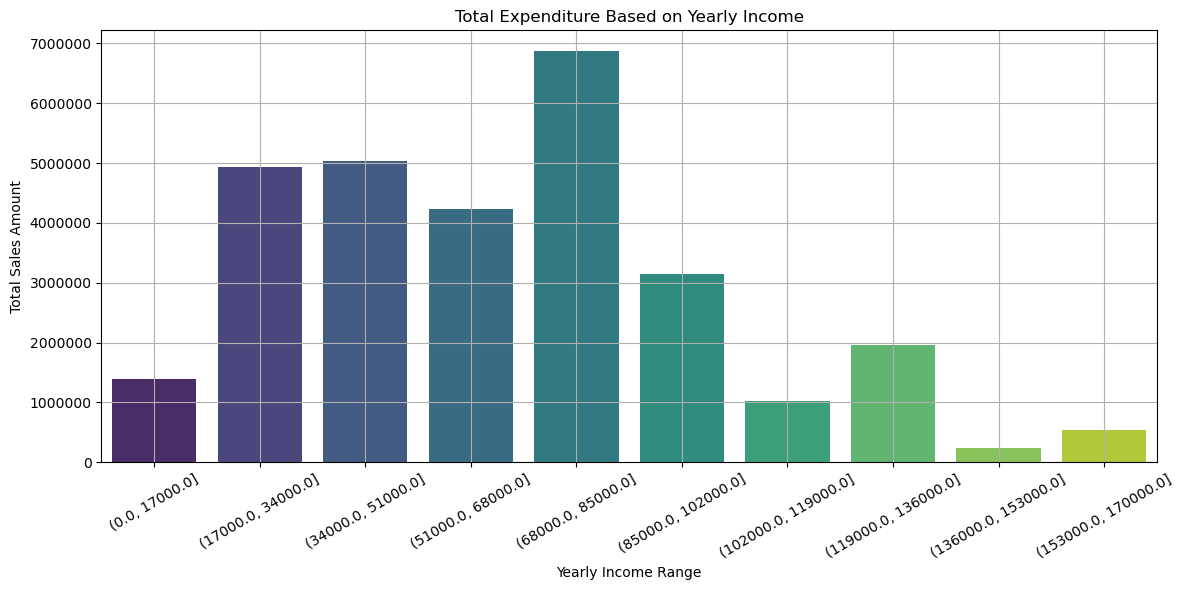

In [36]:
import numpy as np
income_bins = np.linspace(0, merged_data['YearlyIncome'].max(), num=11)
merged_data['YearlyIncomeBin'] = pd.cut(merged_data['YearlyIncome'], bins=income_bins)

# Group by yearly income bins and calculate average sales amount
income_sales_avg = merged_data.groupby('YearlyIncomeBin')['SalesAmount'].sum().reset_index()

# Plotting the average sales amount by yearly income range
plt.figure(figsize=(12, 6))
sns.barplot(x='YearlyIncomeBin', y='SalesAmount', data=income_sales_avg, palette='viridis')
plt.title('Total Expenditure Based on Yearly Income')
plt.xlabel('Yearly Income Range')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=30)
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.tight_layout()

# Save the plot as a file
plt.savefig("Topperformingprod.png", bbox_inches='tight')
plt.show()

# Hypothesis Testing

In [77]:
from scipy.stats import ttest_ind

# Selecting two sales territories for comparison
territory1 = merged_data[merged_data['SalesTerritoryGroup'] == 'North America']['SalesAmount']
territory2 = merged_data[merged_data['SalesTerritoryGroup'] == 'Europe']['SalesAmount']

# Performing t-test
t_stat, p_val = ttest_ind(territory1.dropna(), territory2.dropna())

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

# Decision based on p-value
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean sales amount between the two sales territories.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in mean sales amount between the two sales territories.")


T-statistic: -12.2215210089828
P-value: 2.6896214631705837e-34
Reject the null hypothesis. There is a significant difference in mean sales amount between the two sales territories.


In [70]:
from datetime import datetime
from scipy.stats import ttest_ind

# Calculate the age of each customer
current_year = datetime.now().year
customer['Age'] = current_year - customer['BirthDate'].dt.year

# Merge age information with the main dataset
#merged_data = pd.merge(merged_data, customer[['CustomerKey', 'Age']], how='left', on='CustomerKey')

# Create age groups (e.g., less than 40 and 40 or older)
merged_data['AgeGroup'] = pd.cut(merged_data['Age'], bins=[0, 49, 100], labels=['<70', '>=70'])

# Select sales amount for each age group
age_group1 = merged_data[merged_data['AgeGroup'] == '<40']['SalesAmount']
age_group2 = merged_data[merged_data['AgeGroup'] == '>=40']['SalesAmount']

# Perform t-test
t_stat_age, p_val_age = ttest_ind(age_group1.dropna(), age_group2.dropna())

print(f"Age-Based T-statistic: {t_stat_age}")
print(f"Age-Based P-value: {p_val_age}")

# Decision based on p-value
alpha = 0.05
if p_val_age < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean sales amount between the age groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in mean sales amount between the age groups.")


Age-Based T-statistic: nan
Age-Based P-value: nan
Fail to reject the null hypothesis. There is no significant difference in mean sales amount between the age groups.


In [87]:
# Merge gender information with the main dataset
merged_data = pd.merge(merged_data, customer[['CustomerKey', 'Gender']], how='left', on='CustomerKey')

# Select sales amount for each gender
male_sales = merged_data[merged_data['Gender_x'] == 'M']['SalesAmount']
female_sales = merged_data[merged_data['Gender_x'] == 'F']['SalesAmount']

# Perform t-test
t_stat_gender, p_val_gender = ttest_ind(male_sales.dropna(), female_sales.dropna())

print(f"Gender-Based T-statistic: {t_stat_gender}")
print(f"Gender-Based P-value: {p_val_gender}")

# Decision based on p-value
alpha = 0.05
if p_val_gender < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean sales amount between genders.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in mean sales amount between genders.")


Gender-Based T-statistic: -1.9524194153273964
Gender-Based P-value: 0.05089304314540804
Fail to reject the null hypothesis. There is no significant difference in mean sales amount between genders.


In [91]:
#internetSales_cleaned.to_excel('internetSales.xlsx')
#customer_cleaned.to_excel('customer.xlsx')
#product_cleaned.to_excel('product.xlsx')
#salesTerritory_cleaned.to_excel('salesTerritory.xlsx')
#date.to_excel('date.xlsx')
#geography.to_excel('geography.xlsx')